In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [71]:
df = pd.read_csv("veriler.csv")
df = df[(df["kilo"]>=40) & (df["boy"]>=135)]


In [72]:
x = df.loc[:,["boy","kilo","yas"]]
y= df.loc[:,"cinsiyet"].to_frame()


In [73]:
X_train,X_test,Y_train,Y_test = train_test_split(x,
y,
random_state=0,
test_size=0.33)

In [74]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
knn = KNeighborsClassifier(n_neighbors=5,metric="minkowski")

In [76]:
knn.fit(X_train,Y_train)

c:\Users\Özdemir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [77]:
y_pred = knn.predict(X_test)

In [78]:
print(Y_test)
y_pred


   cinsiyet
6         e
11        k
13        k
14        k
18        e
9         e


array(['e', 'k', 'k', 'k', 'e', 'e'], dtype=object)

In [79]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[3, 0],
       [0, 3]], dtype=int64)

<Axes: xlabel='boy', ylabel='kilo'>

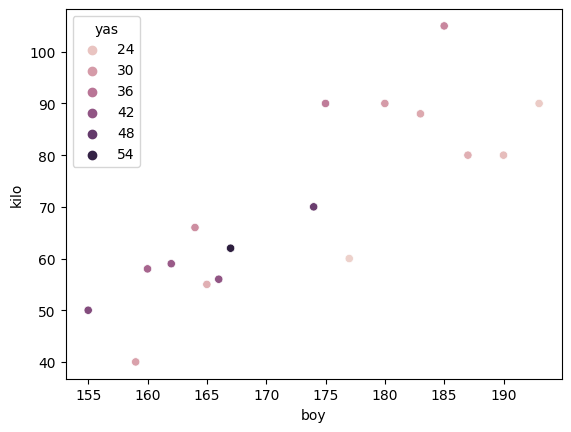

In [80]:
sns.scatterplot(x=df["boy"],y=df["kilo"],hue=df["yas"])